# Assignment 3

**Due: Sunday, 15 September  2019**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [18]:
from scipy import stats
import scipy as sp
import statsmodels.api as sm


## Questions 1-3

The file **Professional.xlsx** contains the responses to the following questions from 410 professionals.

1. What's your age?
2. Are you Male or Female?
3. Are you married?
4. Please indicate your total household income last year.
5. What is the approximate total value of financial investment (exclusive of your own home)?
6. Do you have a Facebook account?
7. How many credit cards do you have currently?

In [3]:
p=pd.read_excel('Professional.xlsx')
p.head(2)

,Age,Gender,Married,Income,Investments,Facebook,Cards
0,38,Female,Yes,75200,12200,Yes,2
1,30,Male,Yes,70300,12400,Yes,2


**[Q1]** Develop 95% confidence intervals of the mean **age, number of credit cards held, and household income** from the sampled  professionals. What does the confidence interval indicate? (1.5 marks)

In [4]:
def CI(df,q):
    n=len(df)
    mean=df.mean()
    std=df.std()
    CI=stats.t.interval(q,n-1,loc=mean,scale=std/np.sqrt(n))
    print('Sample Mean:', mean)
    print('Confidence Interval:', CI)

In [6]:
CI(p['Age'], 0.95)

Sample Mean: 30.11219512195122
Confidence Interval: (29.721530876297816, 30.502859367604625)


In [7]:
CI(p['Cards'], 0.95)

Sample Mean: 2.731707317073171
Confidence Interval: (2.5807802182835458, 2.882634415862796)


In [9]:
CI(p['Income'], 0.95)

Sample Mean: 74459.51219512195
Confidence Interval: (71079.2556007535, 77839.7687894904)


The confidence interval is a range that includes a give fraction of the sampling distribution. The 0.95 confidnce interval in this question indicates a [0.025 %, 0.975 %] range (2.5 percentile to 97.5 percentile) of the sampling distribution of Age mean, cards mean, and income mean.

**[Q2]** Find the mean income of married professionals who are 30 years old or younger. Formulate the hypotheses that can be used to determine if the mean income equals to 70,000. Test if it is equal to 70,000. Can the null hypothesis be rejected at the 10% significnace level? Explain. Do the same test for professionals with age above 30. (1.5 marks)

In [26]:
# the mean income of married professionals who are 30 years old or younger
p[(p['Age'] <= 30)]['Income'].mean()


73600.46728971963

Null Hypothesis: mu = 70,000
Alternative Hypothesis: mu != 70,000

In [31]:
temp_income_30less_df = p[(p['Age'] <= 30)]['Income']

In [32]:
stats.ttest_1samp(temp_income_30less_df, 70000)

Ttest_1sampResult(statistic=1.4457422720577373, pvalue=0.1497192418915781)

Since the p-value is greater than 10 percent, we do not reject the null hypothesis, we do not have enough evidence to reject that the mean is 70,000.

In [30]:
# the mean income of married professionals who are above 30 years old
p[(p['Age']>30)]['Income'].mean()

75397.44897959183

Null Hypothesis: mu = 70,000
Alternative Hypothesis: mu != 70,000

In [33]:
stats.ttest_1samp(p[(p['Age']>30)]['Income'], 70000)

Ttest_1sampResult(statistic=2.28742477962365, pvalue=0.023244334116882644)

Since the p-value is smaller than 10 percent, we reject the null hypothesis, we have sufficient evidence to reject that the mean is 70,000.


**[Q3]** Find the (Pearson) correlation between income and investments. Is the correlation significant (significantly different from 0) at the 10% level? Now, divide the the sample into two groups, one with age>35 the other with age<=35. Obtain scatter plot with a linear fit of income and investments (assigning differet colors over age groups). Test if income and investments are correlated significantly at the 10% level for each age group. (1.5 marks)

In [36]:
stats.pearsonr(p['Income'], p['Investments'])

(0.0030261428197670454, 0.9512892963454571)

The P-value is greater than 10 percent. The correlation coefficient is not statisticallly significant.

In [37]:
age_35more_df = p[(p['Age'] > 35)]
age_35less_df = p[(p['Age'] <= 35)]

In [42]:
p['age_group'] = p['Age'].apply(lambda x: 0 if x > 35 else 1)

In [43]:
p.head(3)

,Age,Gender,Married,Income,Investments,Facebook,Cards,age_group
0,38,Female,Yes,75200,12200,Yes,2,0
1,30,Male,Yes,70300,12400,Yes,2,1
2,41,Female,No,48200,26800,Yes,2,0


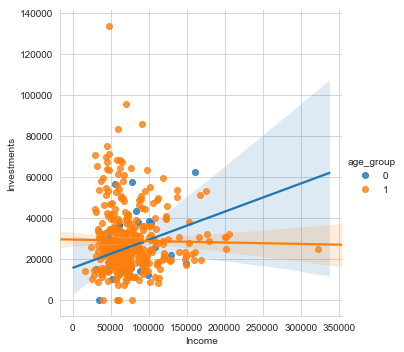

In [46]:
sns.lmplot(x='Income', y='Investments', data=p, hue='age_group')

In [38]:
stats.pearsonr(age_35more_df['Income'], age_35more_df['Investments'])

(0.2952938878984755, 0.09524320928254146)

The correlation is significant at the 10% level

In [39]:
stats.pearsonr(age_35less_df['Income'], age_35less_df['Investments'])

(-0.015660874385396498, 0.7618227954629743)

The correlation is not significant at the 10% level

## Questions 4-7

* Use dataset **movies.xlsx** to answer Questions 4-7
* The dataset contains information of 190 movies, including two variables: Gross (Gross revenue) and Budget (spending), both are in millions.
* Apply sm.OLS for the questions 

In [75]:
mv = pd.read_excel("movies.xlsx")
mv.head(3)

,Gross,Budget
0,95.64,36.0
1,55.65,77.0
2,110.01,90.0


**[Q4]** Find the average budget across two groups of movies: money-making (Gross >= Budget) and money-losing (Gross < Budget). Test if money-making movies and money-losing movies are with the same mean budget. Explain. (1.5 marks)

In [76]:
mv['diff'] = mv['Gross'] - mv['Budget']

In [77]:
# add another column if money-making then 0 , if money-losing then 1.
mv['money-making-losing'] = mv['diff'].apply(lambda x: 0 if x >= 0 else 1)

In [78]:
mv.head(3)

,Gross,Budget,diff,money-making-losing
0,95.64,36.0,59.64,0
1,55.65,77.0,-21.35,1
2,110.01,90.0,20.01,0


In [79]:
# find the average of money-making
mv[(mv['money-making-losing'] == 0)]['Budget'].mean()

58.348684210526315

In [80]:
# find the average of money-losing (another way to calculate)
mv[(mv['Gross'] < mv['Budget'])]['Budget'].mean()

38.76754385964912

In [81]:
# Test if money-making movies and money-losing movies are with the same mean budget 
# (independent t-test (two sample t-test))
# Null hypothesis: mu1 - mu2 = 0
# Alternative hypothesis: mu1 - mu2 != 0
stats.ttest_ind(mv[(mv['money-making-losing'] == 0)]['Budget'], mv[(mv['Gross'] < mv['Budget'])]['Budget'])


Ttest_indResult(statistic=3.5652020084036535, pvalue=0.0004610566247318131)

The p-value of the two-tail test is less than 5% level of significance. We reject the null hypothesis. We have sufficient evidence to reject that the mean budget of both groups are the same.

**[Q5]** Estimate a simple linear regression model of 'Gross'(y)  on 'Budget' (x). Briefly discuss the estimation outcomes.(2 marks)

In [82]:
x = mv['Budget']
x = sm.add_constant(x)
model = sm.OLS(mv['Gross'], x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     248.8
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           2.93e-36
Time:                        07:13:15   Log-Likelihood:                -1039.8
No. Observations:                 190   AIC:                             2084.
Df Residuals:                     188   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.2607      6.635     -3.958      0.0

The coefficient of the independent variable Budget is 1.7385 which indicates that every unit increase in Budget will increase the Gross by 1.7385, and since the coefficient is positive, we have a positive linear relationship between the two variables. The p-value of the variable Budget indicates that the varialbe is statistically significant. The R-squared is 0.57 which means that the independent varialbe Budget can explain 57% of the total variation in Gross.

**[Q6]** Identify a possible outlier (influential observation) in the regression of Q5. Eliminate the outlier and re-estimate the regression of Gross on Budget. (2 marks)

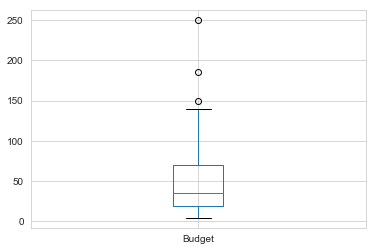

In [83]:
mv['Budget'].plot(kind='box')

 Based on the boxplot, there are three values considered as outliers. Since the question ask to identify a (one) possible outlier, we will drop the largest one.

In [84]:
mv.iloc[mv['Budget'].idxmax()]

Gross                  1000.75
Budget                  250.00
diff                    750.75
money-making-losing       0.00
Name: 70, dtype: float64

In [85]:
mv = mv.drop(70)

In [86]:
x = mv['Budget']
x = sm.add_constant(x)
model = sm.OLS(mv['Gross'], x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     304.4
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           4.36e-41
Time:                        07:14:16   Log-Likelihood:                -933.20
No. Observations:                 189   AIC:                             1870.
Df Residuals:                     187   BIC:                             1877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8796      4.032     -1.458      0.1

**[Q7]** Compare the estimation results with & without the outlier in Q5 & Q6 in terms of model fitness and the effect of Budget (x) to Gross (y).(1.5 marks)

After eliminating the largest outlier, the new regression model has a R-squared value 0.619 which means that the independent variable Budget now can explain 61.9 percent of the total variation in Gross, so Compare to the old model, the total adequacy of the new model is better. The slope coefficent has drop to 1.2219 from 1.7385. The new model should provide us more accurate estimation.

## Questions 8-9

Use the dataset **E_Customers.xlsx** to answer Questions 8-9.

We'll work with the Ecommerce Customers excel file from the company. It has Customer Email and 4 numerical value columns:

* Amount Spent: Yearly amount spent in dollars
* Time on App: Average time spent on Company App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member

The main point of Questions 8-9 is to use Length of Membership, Time on App, and Time on Website (features) to model Amount Spent of E-customers.

In [48]:
# load data
ec=pd.read_excel("E_Customers.xlsx")
ec.head(3)

,Email,Time on App,Time on Website,Length of Membership,Amount Spent
0,mstephenson@fernandez.com,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,11.330278,37.110597,4.104543,487.547505


**[Q8]** Use pairplot to explore relationships among (numeric) variables in the dataset. Among the three features - Length of Membership, Time on App, & Time on Website - which appears to be most relevant to Amount Spent? Why? (1.5 marks)

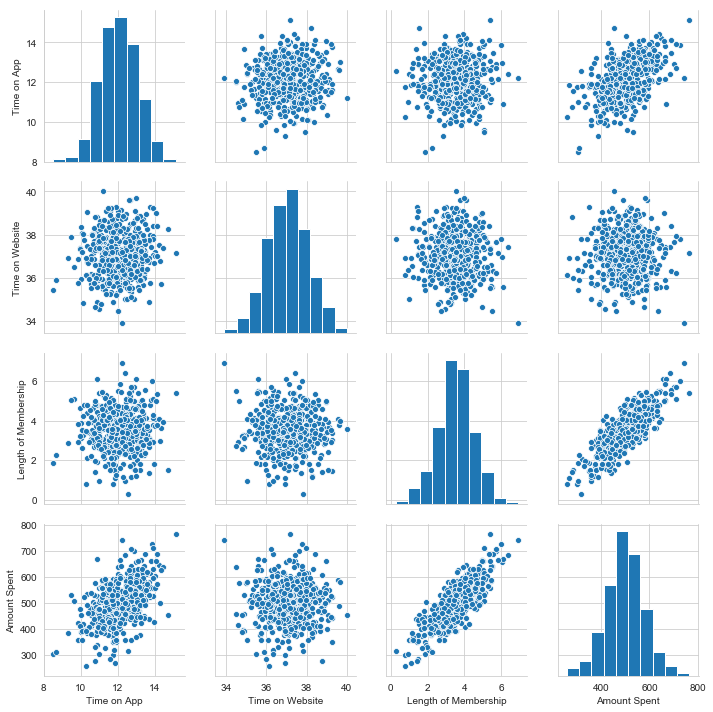

In [49]:
sns.pairplot(ec)

The length of membership seems to have a linear relationship with the amount spent. The scatter plot of these two variables forms a obvious linear pattern while others looks randomly scatter around.

**[Q9]** Regress Amount Spent (y) on Length of Membership (x1), Time on App (x2), and Time on Website (x3) with OLS. Interpret the estimated slope coefficients.(2 marks)

In [53]:
y = ec['Amount Spent']
x = ec[['Length of Membership','Time on App','Time on Website']]
x=sm.add_constant(x)

In [54]:
x.head(3)

,const,Length of Membership,Time on App,Time on Website
0,1.0,4.082621,12.655651,39.577668
1,1.0,2.664034,11.109461,37.268959
2,1.0,4.104543,11.330278,37.110597


In [55]:
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Amount Spent   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1226.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):          6.48e-229
Time:                        06:30:44   Log-Likelihood:                -2363.2
No. Observations:                 500   AIC:                             4734.
Df Residuals:                     496   BIC:                             4751.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -169.9607 

Interpretation of regression coefficients:

1. The coefficient of the independent variable Length of Membership is 63.1 means that if all other independent variables have a value 0 and the variable Length of Membership has a value 1, then the amount spend will be 63.1.

2. The coefficient of the independent variable Time on App is 38.01 means that if all other independent variables have a value 0 and the variable Time on App has a value 1, then the amount spend will be 38.01.

3. The coefficient of the independent variable Time on Website -0.3195 means that if all other independent variables have a value 0 and the variable Time on Website has a value 1, then the amount spend will be -0.3195.

4. The coefficient of the intercept -169.96 means that if all the independent variables have a value 0, then the amount spend will be -196.96